Problem 1

In [1]:
import pandas as pd
diabetes_dataset = pd.read_csv("/content/drive/MyDrive/Concept_and_technologies_of_ai/diabetes_.csv")
diabetes_dataset.info()
diabetes_dataset.head()
diabetes_dataset.describe()
diabetes_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Handiling missing data

In [2]:
missing_info = diabetes_dataset.isnull().sum() / len(diabetes_dataset) * 100
# Handle missing values
for column in diabetes_dataset.columns:
  if missing_info[column] > 10:
    diabetes_dataset[column].fillna(diabetes_dataset[column].mean(), inplace=True)
  else:
     diabetes_dataset.dropna(subset=[column], inplace=True)
print(("Data after processing:n", diabetes_dataset.head()))

('Data after processing:n',    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  )


Feature Engineering

In [3]:
import numpy as np;
X = diabetes_dataset.drop(columns=['Outcome']).values
y = diabetes_dataset['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


Implementing KNN

In [4]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance

prediction

In [5]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)[:k]
  nearest_indices=sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [6]:
def knn_predict(X_test, X_train, y_train, k=3):
  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

In [7]:
def compute_accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

In [8]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
print("Predictions:", predictions)
unscaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Accuracy: 67.3913043478261


Problem 2

In [9]:
def min_max_scaling(X):
  min_values = np.min(X, axis=0)#min of each column
  max_values = np.max(X, axis=0)#max of each column
  X_scaled = (X - min_values) / (max_values - min_values)
  return X_scaled
X_scaled = min_max_scaling(X)
Xscaled_train, Xscaled_test, y_train, y_test = train_test_split_scratch(X_scaled,y,test_size=0.3)

In [10]:
scaled_predictions = knn_predict(Xscaled_test, Xscaled_train, y_train, k=3)
print("Predictions:", predictions)
scaled_accuracy = compute_accuracy(y_test, predictions)
print("Accuracy:", unscaled_accuracy)

Predictions: [0 1 0 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0
 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Accuracy: 67.3913043478261


Problem 3

In [13]:
import matplotlib.pyplot as plt
import time
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
  accuracies = {}
  times={}
  for k in k_values:
    start_time = time.time()
    predictions = knn_predict(X_test, X_train, y_train, k=k)
    accuracy = compute_accuracy(y_test, predictions)
    end_time = time.time()
    execution_time = end_time - start_time
    accuracies[k] = accuracy
    times[k]=execution_time
    print(f"Accuracy for k={k} is {accuracy:.2f}%")
    print(f"Time for k = {k} is {execution_time:.3f}seconds")
  return accuracies, times
k_values = range(1,16)
print("Unscaled data")
accuracy_unscaled, time_unscaled= experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
print("Scaled data")
accuracy_scaled, time_scaled= experiment_knn_k_values(Xscaled_train, y_train, Xscaled_test, y_test, k_values)

Unscaled data
Accuracy for k=1 is 68.70%
Time for k = 1 is 0.920seconds
Accuracy for k=2 is 72.61%
Time for k = 2 is 0.867seconds
Accuracy for k=3 is 67.39%
Time for k = 3 is 0.918seconds
Accuracy for k=4 is 72.17%
Time for k = 4 is 0.859seconds
Accuracy for k=5 is 68.70%
Time for k = 5 is 0.878seconds
Accuracy for k=6 is 70.00%
Time for k = 6 is 0.955seconds
Accuracy for k=7 is 69.13%
Time for k = 7 is 0.862seconds
Accuracy for k=8 is 71.30%
Time for k = 8 is 1.484seconds
Accuracy for k=9 is 70.00%
Time for k = 9 is 1.493seconds
Accuracy for k=10 is 71.74%
Time for k = 10 is 1.360seconds
Accuracy for k=11 is 73.04%
Time for k = 11 is 0.842seconds
Accuracy for k=12 is 73.91%
Time for k = 12 is 0.894seconds
Accuracy for k=13 is 74.35%
Time for k = 13 is 0.870seconds
Accuracy for k=14 is 72.61%
Time for k = 14 is 0.890seconds
Accuracy for k=15 is 73.91%
Time for k = 15 is 0.861seconds
Scaled data
Accuracy for k=1 is 67.39%
Time for k = 1 is 0.932seconds
Accuracy for k=2 is 67.83%
Time fo

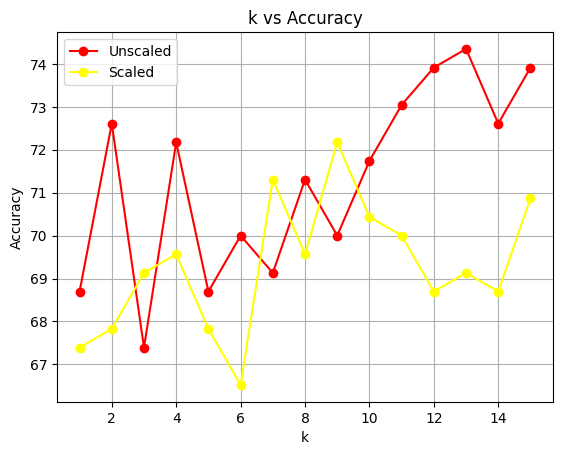

In [22]:
plt.figure()
plt.plot(k_values, accuracy_unscaled.values(), label="Unscaled",marker='o', color='red')
plt.plot(k_values, accuracy_scaled.values(),  label="Scaled",marker='o', color='yellow')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("k vs Accuracy")
plt.legend()
plt.grid()
plt.show()


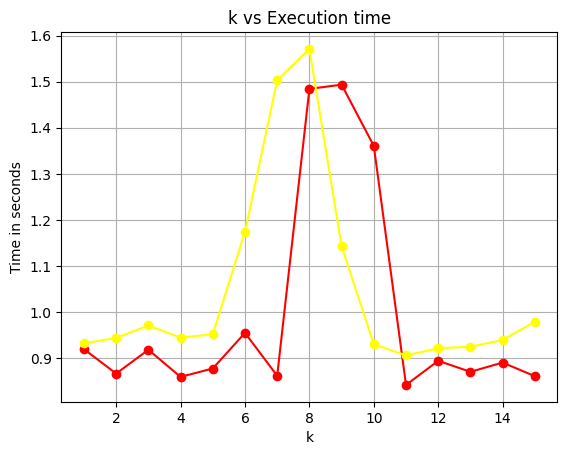

In [23]:
plt.figure()
plt.plot(k_values, time_unscaled.values(),marker='o', color='red')
plt.plot(k_values, time_scaled.values(),marker='o', color='yellow')
plt.xlabel("k")
plt.ylabel("Time in seconds")
plt.title("k vs Execution time")
plt.grid()
plt.show()

Problem 4

Challenges of KNN:
1) High computational cost since distances are computed with all training points.
2) High memory usage as the entire dataset is stored.
3) Curse of dimensionality reduces distance effectiveness in high-dimensional   data.
4) Sensitive to noise and irrelevant features.
5) Requires feature scaling for good performance.

Strategies to Improve KNN Efficiency:
1) Using approximate nearest neighbors.
2) Apply dimensionality reduction.
3) Perform feature selection to remove irrelevant features.
4) Scale data using normalization or standardization.
5) Reduce dataset size using sampling or clustering.

KNN works well for small datasets but needs optimization techniques to handle large and high-dimensional data efficiently.